## Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")  #read housing data

In [3]:
housing.head()  #sneak peek into the data(top 5 rows)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()  #data about housing file(506-quite a small data size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()    #describes the data in the file

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

 ## Train-Test set split

In [8]:
#JUST TO LEARN
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)   #to fix shuffled
    shuffled = np.random.permutation(len(data))    #randomly shuffle up the data
    test_set_size = int(len(data)*test_ratio) #size of test set
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# BUT THIS ALREADY EXISTS IN SKLEARN, THUS, USE THAT

In [9]:
train_set , test_set = split_train_test(housing, 0.2)

In [10]:
print(f"Train set length: {len(train_set)}\n Test set length: {len(test_set)}\n")

Train set length: 405
 Test set length: 101



In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
print(f"Train set length: {len(train_set)}\n Test set length: {len(test_set)}\n")

Train set length: 404
 Test set length: 102



In [13]:
# done because CHAS has 35 1s and rest 0s, thus it may happen that all 1s go into test set and all 0s inot train set
# this splits CHAS proportionally into train and test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy()  #only training eg in housing

# Looking for Correlations

In [17]:
cor_matrix = housing.corr()   #pearson-correlation-coeff
cor_matrix['MEDV'].sort_values()   #tells us how medv changes/correlates with other parameters

LSTAT     -0.740494
PTRATIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.680857
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

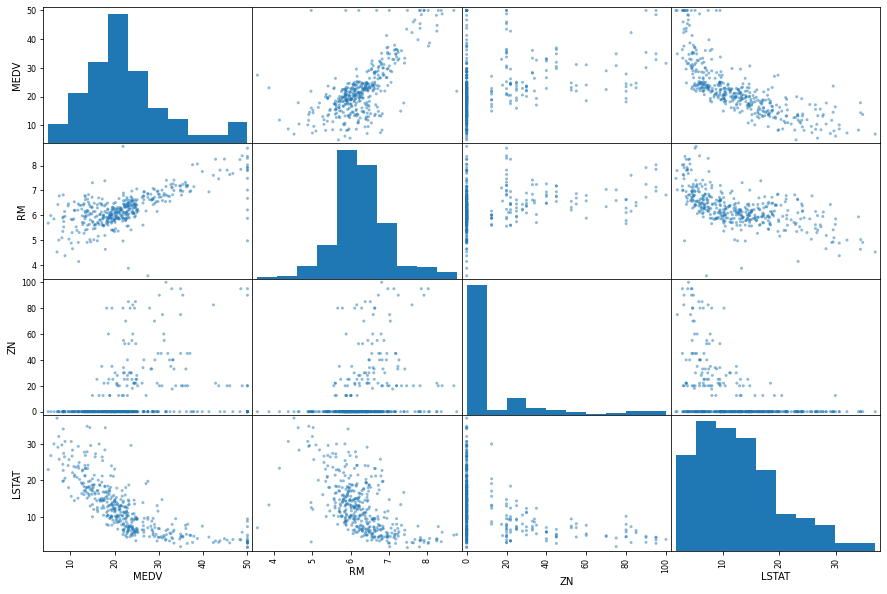

In [18]:
from pandas.plotting import scatter_matrix
attrib = ["MEDV", "RM", "ZN", "LSTAT"]    #plotting chosen attributes
scatter_matrix(housing[attrib], figsize = (15,10))  

#can see negative correlation in LSTAT vs MEDV plot, positive in RM vs MEDV etc

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

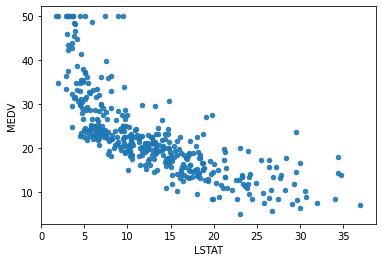

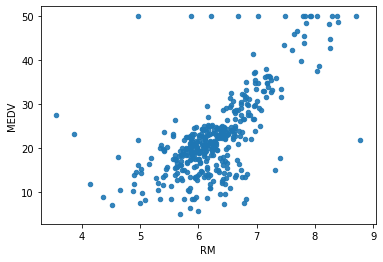

In [19]:
housing.plot(kind = "scatter", x = "LSTAT", y= "MEDV", alpha = 0.9)
housing.plot(kind = "scatter", x = "RM", y= "MEDV", alpha = 0.9)
#just to plot LSTAT,RM vs MEDV
#this is helpfull in removing extra unnecessary points from our data, which may confuse the model later on

# Trying Attribute Combinations

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

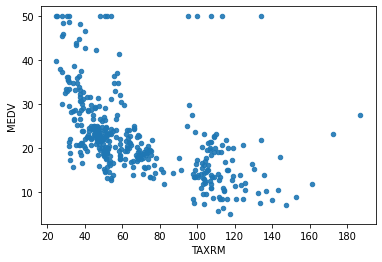

In [20]:
# finding new attributes by combining them
# for eg, tax per room can be derived by diving housing[tax]/housing[rm]
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing.plot(kind = "scatter", x = "TAXRM", y= "MEDV", alpha = 0.9)

# we find a strng negative correlation between tax per room and price of the house

In [21]:
housing = strat_train_set.drop("MEDV", axis=1)   #features
housing_labels = strat_train_set["MEDV"].copy()   #label

# Missing Attributes

In [22]:
# 3 method for taking care of missing attribute points
#    -remove missing data points(good if you have large number of data points)
#    -remove the entire attribute(good if the attribute isn't important/correlation value is near 0)
#    -add a suitable value(0, mean or median)(good almost everytime)

In [23]:
# housingNew = housing.dropna(subset=["RM"])  => option1
# housingNew = housing.drop("RM", axis = 1)  => option2 
# {in both these, housing will remain unchanged}
# median = housing["RM"].median()  (computing median for opt 3)
# housing["RM"].fillna(median)  => option3
#for this we have SimpleImputer class in sklearn

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
x = imputer.transform(housing)

In [26]:
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [27]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Creating a Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   #for standardization(for feature scaling)
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr.shape

(404, 13)

# Selecting a desirable model for prediction 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()  
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [32]:
some_data = housing.iloc[:5]    #taking some data for testing
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)   #feature scaling and other data handling
model.predict(prepared_data)   #predicting

array([22.463, 25.471, 16.331, 23.488, 23.459])

In [33]:
list(some_labels)   

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluation of the model

In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)   #mean squared error
rmse = np.sqrt(mse)  #root mse error
rmse

1.1634295517057218

In [35]:
# With LinearRegression : got rmse of 4.3
# With DecisionTreeRegressor : got rmse of 0.0(overfit)

# Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([2.77806021, 2.72924632, 4.37720047, 2.53091732, 3.3315517 ,
       2.6303775 , 4.76386489, 3.33641865, 3.34755642, 3.19442273])

In [38]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [39]:
print_scores(rmse_scores)

Scores: [2.77806021 2.72924632 4.37720047 2.53091732 3.3315517  2.6303775
 4.76386489 3.33641865 3.34755642 3.19442273]
Mean:  3.301961620269954
Standard deviation:  0.7040608050208857


# Saving the Model

In [40]:
from joblib import dump, load
dump(model, 'RealEstatePredictor.joblib')

['RealEstatePredictor.joblib']

# Testing the Model

In [41]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.913198895359115

## Using the Model

In [42]:
model = load('RealEstatePredictor.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.463])